# Formation ML Flow

L'objectif de cette formation est de vous apprendre à utiliser ML Flow, un dashboard pour expériences de Machine Learning. Cette formation vous montrera pas à pas comment lancer une expérience de Machine Learning et surveiller les paramètres, métriques et resultats de votre expérience grâce à ML Flow. 

Pour cela, la formation s'appuiera sur le célèbre jeu de donnée Iris, qui classifie 150 echantillons de fleur en 3 espèces d'iris : Iris setosa, Iris versicolor et Iris virginica. Le dataset comprend les caractéristiques de chaque échantillon (longueur et largeur des pétales et longueur et largeur des sépales) et nous allons donc essayer de créer plusieurs modèles qui essaieront de classifier les échantillons d'iris selon leurs caractéristiques. 

Commençons par importer les librairies qui vont nous servir :

In [6]:
import mlflow
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import time
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 1. Ouverture et visualisation du dataset Iris

A présent ouvrons le fichier contenant le dataset et affichons les données concernant les 5 premiers échantillons :

In [7]:
dataset = pd.read_csv('iris.csv')
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Affichons maintenant quelques informations sur les caractéristiques des fleurs :

In [8]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Affichons le nombre d'échantillons pour chacune des espèces d'iris :

In [9]:
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Affichons maintenant le nuage de points de chaque paire de caractéristiques. Sur la diagonale, on retrouve un histogramme du nombre d'échantillons selon la valeur de la caractéristique. On peut remarquer certaines structures, par exemple des groupes, dans les relations entre certaines caractéristiques.

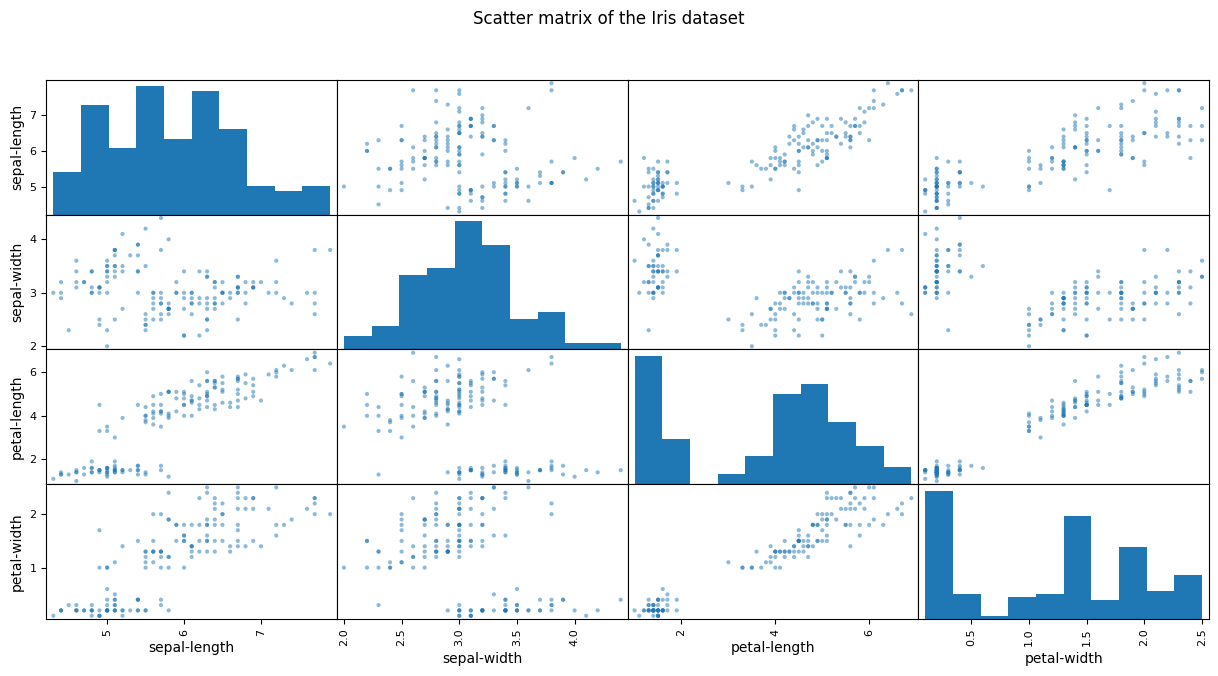

In [10]:
pd.plotting.scatter_matrix(dataset,figsize=(15,7))
plt.suptitle('Scatter matrix of the Iris dataset')
plt.show()

# 2. ML Flow : premiers pas avec un modèle aléatoire

Nous allons maintenant réaliser un premier exemple de modèle de classification très simple : le modèle aléatoire. Ce modèle attribuera aléatoirement une classe à chaque échantillon du dataset. Nous visualiserons ensuite ses performances (pas très bonnes, on l'imagine) avec ML FLow.

Commençons par séparer le dataset en 2 variables : les 4 caractéristiques d'une part (X), et l'espèce d'iris d'autre part (Y).

In [11]:
array = dataset.values
X = array[:,0:4]
Y = array[:,4]

Construisons notre modèle aléatoire :

In [12]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy="uniform")
dummy.fit(X, Y)

DummyClassifier(strategy='uniform')

Affichons ses prédictions pour les premiers échantillons :

In [13]:
Y_pred = dummy.predict(X)
for i in range(5):
    print(X[i], ', vraie classe : ', Y[i], ', prédiction : ', Y_pred[i])

[5.1 3.5 1.4 0.2] , vraie classe :  Iris-setosa , prédiction :  Iris-setosa
[4.9 3.0 1.4 0.2] , vraie classe :  Iris-setosa , prédiction :  Iris-setosa
[4.7 3.2 1.3 0.2] , vraie classe :  Iris-setosa , prédiction :  Iris-virginica
[4.6 3.1 1.5 0.2] , vraie classe :  Iris-setosa , prédiction :  Iris-virginica
[5.0 3.6 1.4 0.2] , vraie classe :  Iris-setosa , prédiction :  Iris-setosa


Nous allons maintenant enregistrer les performances de ce magnifique modèle avec ML Flow. Pour l'instant executez les cellules suivantes "bêtement", nous expliquerons chaque ligne ensuite.

In [14]:
with mlflow.start_run(run_name='Modele_Aleatoire'):
    mlflow.log_param('MODEL_NAME', 'DummyClassifier')
    mlflow.log_metric('Accuracy', accuracy_score(Y, Y_pred))
    mlflow.log_artifact('iris.csv')

Maintenant ouvrez un terminal et naviguez jusqu'au dossier ```formation-mlflow```. Affichez le contenu du dossier. Vous devriez y trouver un nouveau dossier nommé ```mlflow```. Ce dossier contient toutes les informations que nous avons enregistré précédemment.

Toujours dans le dossier ```formation-mlflow```, entrez la commande ```mlflow ui```. Le message ```Serving on http://XXXXXXX:5000``` devrait s'afficher. Ouvrez maintenant un navigateur web et ouvrez une fenêtre vers l'url ```http://localhost:5000/```. Vous devriez voir apparaître le dashboard suivant :

![dashboard](MLFlow.png)

La ligne au milieu du tableau, comportant le nom ```Modele_Aleatoire``` correspond aux données que nous avons enregistré précédemment. Vous pouvez remarquer dans la colonne ```Parameters``` le paramètre  ```MODEL_NAME``` que nous avons enregistré, ainsi que la métrique ```Accuracy``` dans la colonne ```Metrics```. Maintenant cliquez sur cette ligne et vous trouverez le détail des informations concernant ce ```run```. Descendez jusqu'à la section ```Artifacts``` où vous pourrez voir une copie du fichier ```iris.csv```. En cliquant dessus vous pourrez le visualiser en entier.

Revenons maintenant sur la façon dont nous avons enregistré ces informations avec ML FLow.

ML Flow permet d'enregistrer puis visualiser 3 types de choses :
* des **paramètres** : ce sont des valeurs (int, float, string, ...) qui ne varient pas au cours d'un 'run', ici ```MODEL_NAME``` est un paramètre.
* des **métriques** : ce sont des valeurs numériques qui peuvent varier au cours du 'run', ici ```Accuracy``` est une métrique.
* des **fichiers** : ces fichiers peuvent prendre n'importe quelle forme (png, jpeg, gif, txt, ...) et ne sont pas modifiables au cours du 'run. Ici nous avons fait une copie du fichier ```iris.csv```.

Toutes ces variables sont regroupées dans un même 'run', ici nommé 'Modele_Aleatoire'. Un 'run' correspond à une ligne du tableau. Les 'runs' peuvent être regroupés en 'experiences', ici nommée ```Default``` dans la colonne de gauche. Nous verons comment changer le nom de l'expérience par la suite.

Reprenons les lignes de code qui nous ont permis de faire tout ça :

In [15]:
# 1. Création du 'run' ML FLow, nommé ici 'Modele_Aleatoire'
#    Tous les paramètres, métriques ou fichiers que nous enregistrerons ensuite
#    seront enregistré dans ce 'run', qui correspond à une ligne du tableau
with mlflow.start_run(run_name='Modele_Aleatoire'):

    # 2. Enregistrement d'un paramètre
    mlflow.log_param('MODEL_NAME', 'DummyClassifier')

    # 3. Enregistrement d'une métrique
    mlflow.log_metric('Accuracy', accuracy_score(Y, Y_pred))

    # 4. Enregistrement d'un fichier
    mlflow.log_artifact('iris.csv')

## Exercice d'application

En traçant l'histogramme des échantillons selon la valeur de ```petal-width```, on voit qu'on peut assez facilement discriminer les échantillons selon cette variable.

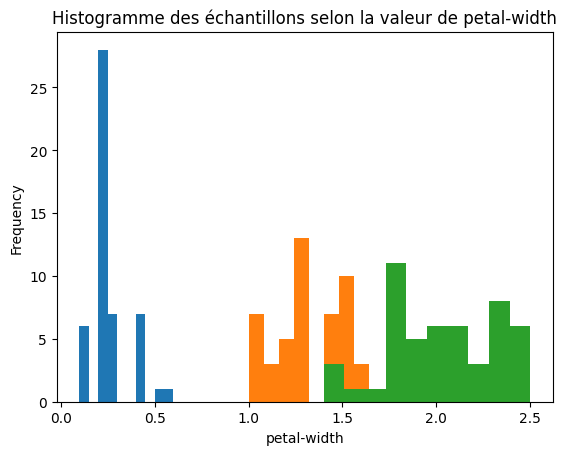

In [16]:
dataset.groupby('class')['petal-width'].plot.hist()
plt.xlabel('petal-width')
plt.title('Histogramme des échantillons selon la valeur de petal-width')
plt.show()

 Nous allons donc essayer de coder notre propre modèle de classification selon cette spécificité et enregistrer ses performances avec ML FLow.

Pour cela, commencez par coder une fonction qui :
* prend en entrée une liste d'échantillons
* retourne la liste des classes des échantillons
* attribue la classe selon la valeur de ```petal-width``` (dernière colonne de l'échantillon). On pourra par exemple déterminer la classe en comparant ```petal-width``` à des seuils bien choisis.

In [17]:
dataset.groupby('class')['petal-width'].describe()

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
Iris-setosa,50.0,0.244,0.107210,0.1,0.2,0.2,0.3,0.6
Iris-versicolor,50.0,1.326,0.197753,1.0,1.2,1.3,1.5,1.8
Iris-virginica,50.0,2.026,0.274650,1.4,1.8,2.0,2.3,2.5


In [18]:
# %load solutions/solution1
# Si vous êtes bloqués, décommentez la ligne précédente et exécutez là pour afficher une solution
def simple_classification_model(list_samples):
    list_classes = []
    for petal_width in list_samples[:,3]:
        if (0.1 <= petal_width <= 0.6):
            list_classes.append("Iris-setosa")
        elif (1 <= petal_width <= 1.6):
            list_classes.append("Iris-versicolor")
        elif (1.6 < petal_width <= 2.5):
            list_classes.append("Iris-virginica")
        else:
            list_classes.append("Unknown")
    return list_classes

Vérifions ici que notre modele fonctionne sur quelques échantillons :

In [19]:
Y_pred = simple_classification_model(X)
for i in range(5):
    print(X[i], ', vraie classe : ', Y[i], ', prédiction : ', Y_pred[i])

[5.1 3.5 1.4 0.2] , vraie classe :  Iris-setosa , prédiction :  Iris-setosa
[4.9 3.0 1.4 0.2] , vraie classe :  Iris-setosa , prédiction :  Iris-setosa
[4.7 3.2 1.3 0.2] , vraie classe :  Iris-setosa , prédiction :  Iris-setosa
[4.6 3.1 1.5 0.2] , vraie classe :  Iris-setosa , prédiction :  Iris-setosa
[5.0 3.6 1.4 0.2] , vraie classe :  Iris-setosa , prédiction :  Iris-setosa


Maintenant à vous d'utiliser MLFLow pour enregistrer l'accuracy de ce nouveau modèle !

In [20]:
# %load solutions/solution2
# Si vous êtes bloqués, décommentez la ligne précédente et exécutez là pour afficher une solution

with mlflow.start_run(run_name='Classe_par_liste'):

    # 2. Enregistrement d'un paramètre
    mlflow.log_param('MODEL_NAME', 'simple_classification')

    # 3. Enregistrement d'une métrique
    mlflow.log_metric('Accuracy', accuracy_score(Y, Y_pred))

    # 4. Enregistrement d'un fichier
    mlflow.log_artifact('iris.csv')

# 3. ML Flow : Comparaison de plusieurs modèles

Nous allons maintenant entraîner différents modèles sur le jeu de données et voir comment nous pouvons les comparer facilement avec ML FLow. Pour cela, nous allons créer plusieurs modèles et estimer leurs performances sur des données qu'ils n'ont pas vu pendant l'entraînement. Commençons par séparer notre dataset en deux parties : une pour l'entraînement et une pour le test.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, random_state=1)

Construisons la liste des modèles à tester :

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LogisticRegression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

Ajoutons cette fonction qui va nous permettre de tracer de jolies matrices de confusion par la suite :

In [23]:
def plot_confusion_matrix(cm, target_names, title, 
                          normalize=True, save_path='matrix.png'):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'\
               .format(accuracy, misclass))
    plt.gcf().canvas.draw()
    plt.savefig(save_path)
    plt.close()

Nous allons maintenant entraîner nos modèles et enregistrer leurs paramètres et métriques avec ML Flow. 

Nous allons voir deux nouvelles choses : 
* Comment créer une nouvelle expérience
* Comment enregistrer plusieurs paramètres ou métriques d'un seul coup

In [24]:
# 1. Création d'une nouvelle expérience
#    Tous les nouveaux runs seront enregistrés dans cette expérience
mlflow.set_experiment('Comparaison')

for name, model in models:
    print(name)

    # 2. Création et début d'un nouveau run
    with mlflow.start_run(run_name=name):

        # 3. Enregistrement de plusieurs paramètres sous forme d'un dictionnaire
        params = {}
        params['MODEL_NAME'] = name
        params['TRAIN_SIZE'] = len(X_train)
        params['TEST_SIZE'] = len(X_val)
        mlflow.log_params(params)

        # On note le moment du début de l'expérience pour mesurer la durée de l'entraînement
        start = time.time()

        # Entraînement du modèle
        model.fit(X_train, Y_train)

        training_time = time.time() - start

        predictions = model.predict(X_val)

        # 4. Enregistrement de plusieurs métriques sous forme d'un dictionnaire
        metrics = {}
        metrics['Accuracy'] = accuracy_score(Y_val, predictions)
        metrics['F1_score'] = f1_score(Y_val, predictions, average='macro')
        metrics['Precision'] = precision_score(Y_val, predictions, average='macro')
        metrics['Recall'] = recall_score(Y_val, predictions, average='macro')
        metrics['Training Time'] = training_time
        mlflow.log_metrics(metrics)

        # 5. Enregistrement de la matrice de confusion
        cm = confusion_matrix(Y_val, predictions)
        plot_confusion_matrix(cm, ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                              'Confusion matrix '+name)
        mlflow.log_artifact('matrix.png')

LogisticRegression
LinearDiscriminantAnalysis
KNeighborsClassifier
DecisionTreeClassifier
GaussianNB
SVM


Retournez maintenant sur votre navigateur pour voir le résultat dans le dashboard ML Flow.

Vous devriez voir une nouvelle expérience 'Comparaison' dans la liste des expériences à gauche. En cliquant dessus vous pourrez voir apparaître les 6 runs que nous venons de lancer. Selectionnez les tous et cliquez sur ```Compare```. Vous pouvez maintenant facilement comparer toutes les caractéristiques de nos modèles. En cliquant sur le nom d'une des métriques vous pourrez afficher un diagramme comparant les valeurs pour tous les modèles.

Revenez au tableau des runs et ouvrer l'un des runs. Dans la partie ```Artifacts``` vous pourrez voir la superbe matrice de confusion que nous avons tracé.

## Exercice d'application

Nous pouvons maintenant comparer le modèle que nous avions codé précedemment dans la fonction ```simple_classification_model``` avec les autres modèles, en enregistrant tout cela dans MLFlow. A vous de jouer !

In [25]:
# %load solutions/solution3
# Si vous êtes bloqués, décommentez la ligne précédente et exécutez là pour afficher une solution

name, model = "simple_classification_model", simple_classification_model
print(name)

# 2. Création et début d'un nouveau run
with mlflow.start_run(run_name=name):

    # 3. Enregistrement de plusieurs paramètres sous forme d'un dictionnaire
    params = {}
    params['MODEL_NAME'] = name
    params['TRAIN_SIZE'] = len(X_train)
    params['TEST_SIZE'] = len(X_val)
    mlflow.log_params(params)

    # On note le moment du début de l'expérience pour mesurer la durée de l'entraînement
    start = time.time()

    training_time = time.time() - start

    predictions = model(X_val)

    # 4. Enregistrement de plusieurs métriques sous forme d'un dictionnaire
    metrics = {}
    metrics['Accuracy'] = accuracy_score(Y_val, predictions)
    metrics['F1_score'] = f1_score(Y_val, predictions, average='macro')
    metrics['Precision'] = precision_score(Y_val, predictions, average='macro')
    metrics['Recall'] = recall_score(Y_val, predictions, average='macro')
    metrics['Training Time'] = training_time
    mlflow.log_metrics(metrics)

    # 5. Enregistrement de la matrice de confusion
    cm = confusion_matrix(Y_val, predictions)
    plot_confusion_matrix(cm, ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
                            'Confusion matrix '+name)
    mlflow.log_artifact('matrix.png')

simple_classification_model


# 4. ML Flow : Enregistrer l'évolution d'une métrique

Dans cette dernière partie, nous allons voir comment enregistrer l'évolution d'une métrique au cours du temps. Pour cela, nous allons utiliser comme modèle un réseau de neurones basique : le perceptron multi-couches.

Afin de calculer nos métriques au cours de l'entrainement, nous decoupons celui-ci en plusieurs epochs. A chaque epoch, le reseau de neurone s'entraîne une fois sur l'intégralité du dataset. Tout ceci est fait automatiquement dans la fonction ```fit``` par défaut de scikit learn, mais nous allons faire les choses manuellement ici, pour visualiser l'évolution des métriques au cours de l'apprentissage.

In [26]:
from sklearn.neural_network import MLPClassifier
import time

# 1. Création et début d'un nouveau run
with mlflow.start_run(run_name='Multilayer Perceptron'):

    model = MLPClassifier(max_iter=10)
    mlflow.log_param('MODEL_NAME', 'MLPClassifier')

    N_TRAIN_SAMPLES = X_train.shape[0]
    N_EPOCHS = 50
    N_BATCH = 8
    N_CLASSES = np.unique(Y_train)
    scores_train = []
    scores_test = []

    # EPOCH
    epoch = 0
    while epoch < N_EPOCHS:
        if epoch % 5 == 0 : print('Epoch: ', epoch)
        # SHUFFLING
        random_perm = np.random.permutation(X_train.shape[0])
        mini_batch_index = 0
        while True:
            # TRAIN ON MINI-BATCH
            indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
            model.partial_fit(X_train[indices], Y_train[indices], classes=N_CLASSES)
            mini_batch_index += N_BATCH
            if mini_batch_index >= N_TRAIN_SAMPLES:
                break

        metrics = {}
        predictions = model.predict(X_val)
        metrics['Accuracy'] = accuracy_score(Y_val, predictions)
        metrics['Precision'] = precision_score(Y_val, predictions, average='macro')
        metrics['Recall'] = recall_score(Y_val, predictions, average='macro')
        metrics['Loss'] = model.loss_
        # 2. Enregistrement de plusieurs métriques pour une epoch donnée
        mlflow.log_metrics(metrics, step=epoch)
        time.sleep(3)

        epoch += 1

Epoch:  0


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Epoch:  5


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch:  10
Epoch:  15
Epoch:  20
Epoch:  25
Epoch:  30
Epoch:  35
Epoch:  40
Epoch:  45


Revenez sur le tableau des runs dans le dashboard et ouvrez le run que nous venons de créer. En cliquant sur l'une des métriques, vous pourrez voir son évolution au cours de l'apprentissage du réseau de neurones.

# 5. Un exercice d'application météo

Pour finir, je vous propose un exercice d'application sur le thème de la météo, qui regroupera tout ce que nous avons appris ici.

Pour cela nous allons étudier la température sur l'île d'Ouessant : le fichier ```ouessant_temperature.csv``` contient l'historique des températures à Ouessant, mesurées toutes les 6 minutes durant l'année 2018.



In [27]:
meteo_dataset = pd.read_csv('ouessant_temperature.csv')

In [28]:
meteo_dataset.head()

,t
0,282.65
1,282.65
2,282.75
3,282.95
4,283.05


ValueError: The number of FixedLocator locations (13), usually from a call to set_ticks, does not match the number of labels (12).

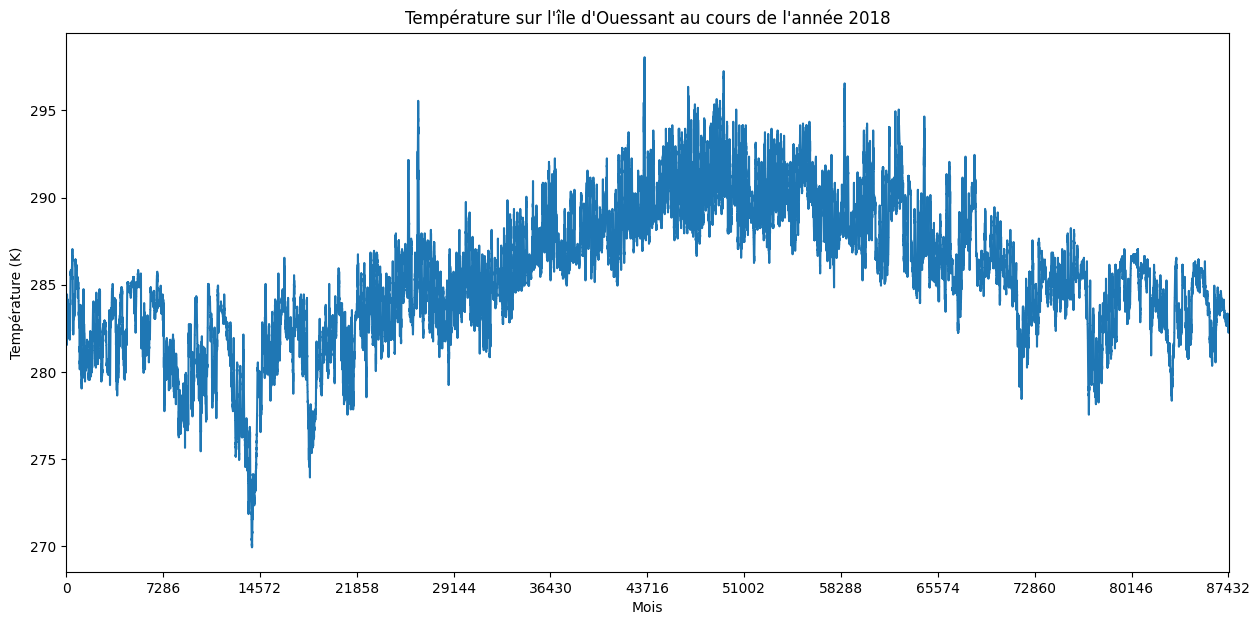

In [29]:
meteo_dataset.t.plot(figsize=(15,7))
plt.title("Température sur l'île d'Ouessant au cours de l'année 2018")
plt.ylabel('Température (K)')
plt.xlabel('Mois')
plt.xlim(0,87453)
plt.xticks(np.arange(0,87453,7286), ['J','F','M','A','M','J','J','A','S','O','N','D'])
plt.grid(axis='both')
plt.show()

Notre objectif est de comparer des modèles de prévision de température. Ces modèles prendront en entrée l'historique des températures sur 2h et devront prévoir la température pendant l'heure suivante.

Commençons par créer notre dataset de séquences de température sur 3h.

In [ ]:
data = meteo_dataset.t.values
len_sequence = 30   # 10 samples per hour during 3 hours
dataset = []
i = 0
while i < len(data)-len_sequence:
    dataset.append(data[i:i+len_sequence])
    i += len_sequence
dataset = np.stack(dataset, axis=0)
dataset.shape

(2915, 30)

Séparons les données en X et Y, puis créons un jeu d'entraînement et un jeu de test :

In [ ]:
X = dataset[:,:20]
Y = dataset[:,20:]
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.20, random_state=1)

Maintenant, à vous de jouer ! 
* Créez au moins **3 modèles de prévisions** de températures comme nous l'avons fait dans le premier exercice. On pourra commencer par des modèles simples tels que la persistance.
* Ajoutez au moins **3 métriques** pour évaluer les performances de vos modèles.
* Pour chaque métrique, évaluez là sur l'ensemble de votre prévision, mais aussi sur chacune des échéances (t1, t2, t3,...) afin de tracer dans MLFlow la courbe d'évolution de cette métrique.
* Enregistrez tout cela dans MLFlow, dans une nouvelle expérience.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression
model = []
# Modele de prévision
model.append(("LinearRegression", LinearRegression))
model.append(("MLPRegressor", MLPRegressor))
model.append(("SGDRegressor", SGDRegressor))

In [ ]:
X_train.shape

(2332, 20)

In [ ]:
mlflow.set_experiment('Météo')

for name, model in models:
    print(name)
    with mlflow.start_run(run_name='Multilayer Perceptron'):

        mlflow.log_param('MODEL_NAME', name)

        N_TRAIN_SAMPLES = X_train.shape[0]
        N_EPOCHS = 50
        N_BATCH = 8
        N_CLASSES = np.unique(Y_train)
        scores_train = []
        scores_test = []

        # EPOCH
        epoch = 0
        while epoch < N_EPOCHS:
            if epoch % 5 == 0 : print('Epoch: ', epoch)
            # SHUFFLING
            random_perm = np.random.permutation(X_train.shape[0])
            mini_batch_index = 0
            while True:
                # TRAIN ON MINI-BATCH
                indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
                model.fit(X_train[indices], Y_train[indices])
                mini_batch_index += N_BATCH
                if mini_batch_index >= N_TRAIN_SAMPLES:
                    break

            metrics = {}
            predictions = model.predict(X_val)
            metrics['Accuracy'] = accuracy_score(Y_val, predictions)
            metrics['F1_score'] = f1_score(Y_val, predictions)
            metrics['Precision'] = precision_score(Y_val, predictions, average='macro')
            metrics['Recall'] = recall_score(Y_val, predictions, average='macro')
            metrics['Loss'] = model.loss_
            # 2. Enregistrement de plusieurs métriques pour une epoch donnée
            mlflow.log_metrics(metrics, step=epoch)
            time.sleep(3)

            epoch += 1

LogisticRegression
Epoch:  0


ValueError: y should be a 1d array, got an array of shape (8, 10) instead.

In [1]:
import mlflow
from mlflow.models import infer_signature

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Load the Iris dataset
X, y = datasets.load_iris(return_X_y=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define the model hyperparameters
params = {
    "solver": "lbfgs",
    "max_iter": 1000,
    "multi_class": "auto",
    "random_state": 8888,
}

# Train the model
lr = LogisticRegression(**params)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)


In [2]:
# Create a new MLflow Experiment
mlflow.set_experiment("MLflow Quickstart")

# Start an MLflow run
with mlflow.start_run():
    # Log the hyperparameters
    mlflow.log_params(params)

    # Log the loss metric
    mlflow.log_metric("accuracy", accuracy)

    # Set a tag that we can use to remind ourselves what this run was for
    mlflow.set_tag("Training Info", "Basic LR model for iris data")

    # Infer the model signature
    signature = infer_signature(X_train, lr.predict(X_train))

    # Log the model
    model_info = mlflow.sklearn.log_model(
        sk_model=lr,
        artifact_path="iris_model",
        signature=signature,
        input_example=X_train,
        registered_model_name="tracking-quickstart",
    )

2024/04/01 16:34:31 INFO mlflow.tracking.fluent: Experiment with name 'MLflow Quickstart' does not exist. Creating a new experiment.
Successfully registered model 'tracking-quickstart'.
Created version '1' of model 'tracking-quickstart'.


In [3]:
# Load the model back for predictions as a generic Python Function model
loaded_model = mlflow.pyfunc.load_model(model_info.model_uri)

predictions = loaded_model.predict(X_test)

iris_feature_names = datasets.load_iris().feature_names

result = pd.DataFrame(X_test, columns=iris_feature_names)
result["actual_class"] = y_test
result["predicted_class"] = predictions

result[:4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),actual_class,predicted_class
0,6.1,2.8,4.7,1.2,1,1
1,5.7,3.8,1.7,0.3,0,0
2,7.7,2.6,6.9,2.3,2,2
3,6.0,2.9,4.5,1.5,1,1


In [4]:
from mlflow import MlflowClient
from pprint import pprint
from sklearn.ensemble import RandomForestRegressor


In [5]:
client = MlflowClient(tracking_uri="http://127.0.0.1:5000")


In [6]:
all_experiments = client.search_experiments()

print(all_experiments)

[<Experiment: artifact_location='file:///c:/Users/User/Desktop/Git/Simplon/Tuto/formation-mlflow/mlruns/218822971332507792', creation_time=1711982071776, experiment_id='218822971332507792', last_update_time=1711982071776, lifecycle_stage='active', name='MLflow Quickstart', tags={}>, <Experiment: artifact_location='file:///c:/Users/User/Desktop/Git/Simplon/Tuto/formation-mlflow/mlruns/299588324104536497', creation_time=1711715474767, experiment_id='299588324104536497', last_update_time=1711715474767, lifecycle_stage='active', name='Météo', tags={}>, <Experiment: artifact_location='file:///c:/Users/User/Desktop/Git/Simplon/Tuto/formation-mlflow/mlruns/160322473791074321', creation_time=1711708679103, experiment_id='160322473791074321', last_update_time=1711708679103, lifecycle_stage='active', name='Comparaison', tags={}>, <Experiment: artifact_location='file:///c:/Users/User/Desktop/Git/Simplon/Tuto/formation-mlflow/mlruns/0', creation_time=1711703773800, experiment_id='0', last_update_t

In [7]:
default_experiment = [
    {"name": experiment.name, "lifecycle_stage": experiment.lifecycle_stage}
    for experiment in all_experiments
    if experiment.name == "Default"
][0]

pprint(default_experiment)


{'lifecycle_stage': 'active', 'name': 'Default'}


In [8]:
# Provide an Experiment description that will appear in the UI
experiment_description = (
    "This is the grocery forecasting project. "
    "This experiment contains the produce models for apples."
)

# Provide searchable tags that define characteristics of the Runs that
# will be in this Experiment
experiment_tags = {
    "project_name": "grocery-forecasting",
    "store_dept": "produce",
    "team": "stores-ml",
    "project_quarter": "Q3-2023",
    "mlflow.note.content": experiment_description,
}

# Create the Experiment, providing a unique name
produce_apples_experiment = client.create_experiment(
    name="Apple_Models", tags=experiment_tags
)


In [9]:
# Use search_experiments() to search on the project_name tag key

apples_experiment = client.search_experiments(
    filter_string="tags.`project_name` = 'grocery-forecasting'"
)

print(vars(apples_experiment[0]))

{'_experiment_id': '254774732239308216', '_name': 'Apple_Models', '_artifact_location': 'mlflow-artifacts:/254774732239308216', '_lifecycle_stage': 'active', '_tags': {'mlflow.note.content': 'This is the grocery forecasting project. This experiment contains the produce models for apples.', 'project_name': 'grocery-forecasting', 'project_quarter': 'Q3-2023', 'store_dept': 'produce', 'team': 'stores-ml'}, '_creation_time': 1711985089455, '_last_update_time': 1711985089455}


In [16]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


def generate_apple_sales_data_with_promo_adjustment(
    base_demand: int = 1000, n_rows: int = 5000
):
    """
    Generates a synthetic dataset for predicting apple sales demand with seasonality
    and inflation.

    This function creates a pandas DataFrame with features relevant to apple sales.
    The features include date, average_temperature, rainfall, weekend flag, holiday flag,
    promotional flag, price_per_kg, and the previous day's demand. The target variable,
    'demand', is generated based on a combination of these features with some added noise.

    Args:
        base_demand (int, optional): Base demand for apples. Defaults to 1000.
        n_rows (int, optional): Number of rows (days) of data to generate. Defaults to 5000.

    Returns:
        pd.DataFrame: DataFrame with features and target variable for apple sales prediction.

    Example:
        >>> df = generate_apple_sales_data_with_seasonality(base_demand=1200, n_rows=6000)
        >>> df.head()
    """

    # Set seed for reproducibility
    np.random.seed(9999)

    # Create date range
    dates = [datetime.now() - timedelta(days=i) for i in range(n_rows)]
    dates.reverse()

    # Generate features
    df = pd.DataFrame(
        {
            "date": dates,
            "average_temperature": np.random.uniform(10, 35, n_rows),
            "rainfall": np.random.exponential(5, n_rows),
            "weekend": [(date.weekday() >= 5) * 1 for date in dates],
            "holiday": np.random.choice([0, 1], n_rows, p=[0.97, 0.03]),
            "price_per_kg": np.random.uniform(0.5, 3, n_rows),
            "month": [date.month for date in dates],
        }
    )

    # Introduce inflation over time (years)
    df["inflation_multiplier"] = (
        1 + (df["date"].dt.year - df["date"].dt.year.min()) * 0.03
    )

    # Incorporate seasonality due to apple harvests
    df["harvest_effect"] = np.sin(2 * np.pi * (df["month"] - 3) / 12) + np.sin(
        2 * np.pi * (df["month"] - 9) / 12
    )

    # Modify the price_per_kg based on harvest effect
    df["price_per_kg"] = df["price_per_kg"] - df["harvest_effect"] * 0.5

    # Adjust promo periods to coincide with periods lagging peak harvest by 1 month
    peak_months = [4, 10]  # months following the peak availability
    df["promo"] = np.where(
        df["month"].isin(peak_months),
        1,
        np.random.choice([0, 1], n_rows, p=[0.85, 0.15]),
    )

    # Generate target variable based on features
    base_price_effect = -df["price_per_kg"] * 50
    seasonality_effect = df["harvest_effect"] * 50
    promo_effect = df["promo"] * 200

    df["demand"] = (
        base_demand
        + base_price_effect
        + seasonality_effect
        + promo_effect
        + df["weekend"] * 300
        + np.random.normal(0, 50, n_rows)
    ) * df[
        "inflation_multiplier"
    ]  # adding random noise

    # Add previous day's demand
    df["previous_days_demand"] = df["demand"].shift(1)
    df["previous_days_demand"].fillna(
        method="bfill", inplace=True
    )  # fill the first row

    # Drop temporary columns
    df.drop(columns=["inflation_multiplier", "harvest_effect", "month"], inplace=True)

    return df

In [11]:
import mlflow
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [12]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")


In [13]:
# Sets the current active experiment to the "Apple_Models" experiment and
# returns the Experiment metadata
apple_experiment = mlflow.set_experiment("Apple_Models")

# Define a run name for this iteration of training.
# If this is not set, a unique name will be auto-generated for your run.
run_name = "apples_rf_test"

# Define an artifact path that the model will be saved to.
artifact_path = "rf_apples"


In [18]:
data = generate_apple_sales_data_with_promo_adjustment()

C:\Users\User\AppData\Local\Temp\ipykernel_1244\3859398416.py:89: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["previous_days_demand"].fillna(
C:\Users\User\AppData\Local\Temp\ipykernel_1244\3859398416.py:89: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["previous_days_demand"].fillna(


In [19]:
# Split the data into features and target and drop irrelevant date field and target field
X = data.drop(columns=["date", "demand"])
y = data["demand"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

params = {
    "n_estimators": 100,
    "max_depth": 6,
    "min_samples_split": 10,
    "min_samples_leaf": 4,
    "bootstrap": True,
    "oob_score": False,
    "random_state": 888,
}

# Train the RandomForestRegressor
rf = RandomForestRegressor(**params)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Predict on the validation set
y_pred = rf.predict(X_val)

# Calculate error metrics
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_pred)

# Assemble the metrics we're going to write into a collection
metrics = {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}

# Initiate the MLflow run context
with mlflow.start_run(run_name=run_name) as run:
    # Log the parameters used for the model fit
    mlflow.log_params(params)

    # Log the error metrics that were calculated during validation
    mlflow.log_metrics(metrics)

    # Log an instance of the trained model for later use
    mlflow.sklearn.log_model(
        sk_model=rf, input_example=X_val, artifact_path=artifact_path
    )


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlflow\types\utils.py:393: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` mo